In [4]:
import numpy as np
from PIL import Image
from scipy.misc import imread, imshow
from scipy import ndimage
import matplotlib.pyplot as plt


def BilinearInterpolation(imArr, pix, posX, posY):

    X_int = int(posX)
    Y_int = int(posY)
    X_float = posX - X_int
    Y_float = posY - Y_int
    X_int_inc = min(X_int+1, imArr.shape[1]-1)
    Y_int_inc = min(Y_int+1, imArr.shape[0]-1)

    bl = pix[Y_int, X_int]
    br = pix[Y_int, X_int_inc]
    tl = pix[Y_int_inc, X_int]
    tr = pix[Y_int_inc, X_int_inc]

    b = X_float*br + (1. - X_float)*bl
    t = X_float*tr + (1. - X_float)*tl
    result = int(Y_float*t + (1. - Y_float)*b + 0.5)

    return result


def kNearest(imArr, pix, k, posX, posY):

	X_int = int(posX)
	Y_int = int(posY)
	sum  = 0

	for c in range(max(0, X_int-k), min(imArr.shape[0], X_int+k)):
		for r in range(max(0, Y_int-k), min(imArr.shape[1], Y_int+k)):
			sum += imArr[c, r]

	result = sum/((2*k+1)**2)
	return result


path = input("Path to picture: ")
img = Image.open(path, 'r')
img = img.convert('L') # преобразование в изображение в оттенках серого
imArr = np.asarray(img)
pix = img.load() # выгрузка значений пикселов
coef = input("Resize coefficient: ")
coef = float(coef)
newShape = list(map(int, [imArr.shape[0]*coef, imArr.shape[1]*coef]))
resultImg = np.empty(newShape, dtype = np.uint8)
rowScale = float(imArr.shape[0]) / float(resultImg.shape[0])
colScale = float(imArr.shape[1]) / float(resultImg.shape[1])

def resize():
    methods = {'1': 'K nearest neighborg', '2': 'Bilinear interpolation'}
    for method in methods:
        print(method, methods[method])
    key = input("Enter method number: ")
    if key in methods:
        try:
            if key == '1':
                k = input("Enter k: ")
                k = int(k)
                for r in range(resultImg.shape[0]):
                    for c in range(resultImg.shape[1]):
                        old_r = r * rowScale # координата в начальном изображении
                        old_c = c * colScale
                        resultImg[c, r] = kNearest(imArr, pix, k, old_c, old_r)
     
                plt.imshow(np.uint8(resultImg), cmap = 'gray')
                plt.show()
    
            elif key == '2':
                for r in range(resultImg.shape[0]):
                    for c in range(resultImg.shape[1]):
                        old_r = r * rowScale
                        old_c = c * colScale
                        resultImg[c, r] = BilinearInterpolation(imArr, pix, old_c, old_r)
                plt.imshow(np.uint8(resultImg), cmap = 'gray')
    # 			plt.show()
    
        except:
            print('Invalid input')
    
    else:
        print('Invalid input')

Path to picture: 5.jpg
Resize coefficient: 2


1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 1
Enter k: 2


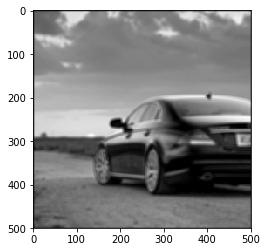

In [5]:
resize()

1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 2


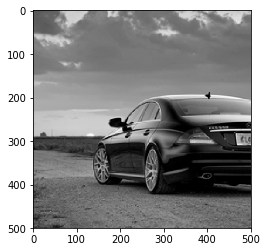

In [6]:
resize()

1 K nearest neighborg
2 Bilinear interpolation
Enter method number: 1
Enter k: 1


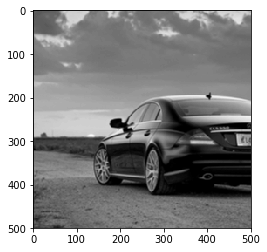

In [7]:
resize()